In [1]:
from keras.layers import Input ,Lambda,Dense, Flatten

Using TensorFlow backend.


In [2]:
from keras.models import Model

In [3]:
from keras.applications.vgg16 import VGG16

In [4]:
from keras.applications.vgg16 import preprocess_input

In [5]:
from keras.preprocessing import image 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from keras.models import Sequential

In [8]:
import numpy as np

In [9]:
from glob import glob

In [10]:
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE=[224,224]

In [12]:
train_path="E:/project data/data/train"
vali_path="E:/project data/data/test"

In [13]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
for layer in vgg.layers:
  layer.trainable=False

In [15]:
folders=glob("E:/project data/data/train/*")

In [16]:
folders

['E:/project data/data/train\\aiswarya',
 'E:/project data/data/train\\akansha',
 'E:/project data/data/train\\andrew',
 'E:/project data/data/train\\ann mariya',
 'E:/project data/data/train\\aparna',
 'E:/project data/data/train\\manu']

In [17]:
x=Flatten()(vgg.output)

In [18]:
prediction =Dense(6,activation='softmax')(x)

In [19]:
model=Model(input=vgg.input,output=prediction)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [24]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=100,class_mode="categorical")

Found 4986 images belonging to 6 classes.


In [26]:
test_set=test_datagen.flow_from_directory(vali_path,target_size=(224,224),batch_size=100,class_mode="categorical")

Found 1249 images belonging to 6 classes.


In [28]:
r=model.fit_generator(training_set,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set),epochs=15)

Epoch 1/15
50/50 [==============================] - 201s 4s/step - loss: 0.0425 - acc: 0.9914 - val_loss: 2.6467e-04 - val_acc: 1.0000
Epoch 2/15
50/50 [==============================] - 180s 4s/step - loss: 4.1664e-04 - acc: 1.0000 - val_loss: 2.1064e-04 - val_acc: 1.0000
Epoch 3/15
50/50 [==============================] - 186s 4s/step - loss: 2.9974e-04 - acc: 1.0000 - val_loss: 1.7477e-04 - val_acc: 1.0000
Epoch 4/15
50/50 [==============================] - 185s 4s/step - loss: 2.4630e-04 - acc: 1.0000 - val_loss: 1.4843e-04 - val_acc: 1.0000
Epoch 5/15
50/50 [==============================] - 148s 3s/step - loss: 2.3092e-04 - acc: 1.0000 - val_loss: 1.4334e-04 - val_acc: 1.0000
Epoch 6/15
50/50 [==============================] - 115s 2s/step - loss: 2.1567e-04 - acc: 1.0000 - val_loss: 1.2641e-04 - val_acc: 1.0000
Epoch 7/15
50/50 [==============================] - 118s 2s/step - loss: 1.9428e-04 - acc: 1.0000 - val_loss: 1.1667e-04 - val_acc: 1.0000
Epoch 8/15
50/50 [=============

In [29]:
model.save('face_rect.h5')

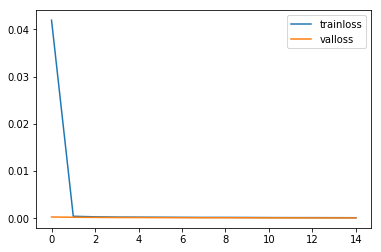

In [30]:
plt.plot(r.history['loss'],label="trainloss")
plt.plot(r.history['val_loss'],label="valloss")
plt.legend()
plt.show()